# 1. Find a topic & a dataset.

## Glassdoor Job Reviews

Link - https://www.kaggle.com/datasets/davidgauthier/glassdoor-job-reviews

This dataset contains employee reviews from Glassdoor with both qualitative text (review headlines, pros, cons) and quantitative ratings (overall satisfaction, work-life balance, culture & values, diversity & inclusion, career opportunities, compensation & benefits, and senior management). It includes job titles, company names, locations, and employment status (current/former) across UK-based organizations, providing rich narrative insights into workplace experiences and organizational culture.

Objectives:
Identify the key drivers of workplace satisfaction and retention by analyzing how organizational factors like leadership, culture, and work-life balance influence employee experience and recommendation behavior.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
reviews_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DESIGNTK530/Datasets/Assignment_7/glassdoor_reviews.csv')
print(reviews_data.columns)
reviews_data.head()

Index(['firm', 'date_review', 'job_title', 'current', 'location',
       'overall_rating', 'work_life_balance', 'culture_values',
       'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt',
       'recommend', 'ceo_approv', 'outlook', 'headline', 'pros', 'cons'],
      dtype='object')


,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."


# 2. Clean, Organize & Explore

## Problem 2.1 - Clean & Organize the data

In [4]:
# Checking for missing values before clean up
reviews_data.isna().sum()

,0
firm,0
date_review,0
job_title,0
current,0
location,297343
overall_rating,0
work_life_balance,149894
culture_values,191373
diversity_inclusion,702500
career_opp,147501


In [5]:
# Removing unecessary columns
"""
All the columns in this table contain useful information thus, keeping all
of them for a better analysis.
"""

# Handling data types by convert rating related columns to numeric
rating_cols = [
    'overall_rating', 'work_life_balance', 'culture_values', 'diversity_inclusion',
    'career_opp', 'comp_benefits', 'senior_mgmt'
]

reviews_data[rating_cols] = reviews_data[rating_cols].apply(pd.to_numeric, errors='coerce')

# Fill missing numeric fields with median
num_cols = [
    'overall_rating', 'work_life_balance', 'culture_values', 'diversity_inclusion',
    'career_opp','comp_benefits', 'senior_mgmt'
]
for col in num_cols:
    reviews_data[col] = reviews_data[col].fillna(reviews_data[col].median())

# Converting date col to datetime
reviews_data['date_review'] = pd.to_datetime(reviews_data['date_review'], errors='coerce')

In [6]:
# Filling missing text fields with placeholder values
reviews_data['job_title'] = reviews_data['job_title'].fillna('Unknown')
reviews_data['location'] = reviews_data['location'].fillna('Unknown')

reviews_data['headline'] = reviews_data['headline'].fillna("No headline provided")
reviews_data['pros'] = reviews_data['pros'].fillna("Not provided")
reviews_data['cons'] = reviews_data['cons'].fillna("Not provided")

In [7]:
# Checking unique values in categorical columns before mapping
reviews_data["ceo_approv"].unique()

array(['o', 'r', 'x', 'v'], dtype=object)

In [8]:
# Creating categorical mappings based on unique values identified above
mapping_values = {
    'o': 'Approve',
    'x': 'Disapprove',
    'r': 'Neutral',
    'v': 'No Response'
}

reviews_data['recommend'] = reviews_data['recommend'].map(mapping_values)
reviews_data['ceo_approv'] = reviews_data['ceo_approv'].map(mapping_values)
reviews_data['outlook'] = reviews_data['outlook'].map(mapping_values)

In [9]:
print("\nData types after cleaning:")
print(reviews_data.dtypes)


Data types after cleaning:
firm                           object
date_review            datetime64[ns]
job_title                      object
current                        object
location                       object
overall_rating                  int64
work_life_balance             float64
culture_values                float64
diversity_inclusion           float64
career_opp                    float64
comp_benefits                 float64
senior_mgmt                   float64
recommend                      object
ceo_approv                     object
outlook                        object
headline                       object
pros                           object
cons                           object
dtype: object


In [10]:
print("Dataframe after cleaning")
reviews_data.head()

Dataframe after cleaning


,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,Unknown,2,4.0,3.0,4.0,2.0,3.0,3.0,Disapprove,Approve,Neutral,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,4.0,2.0,1.0,4.0,Disapprove,Approve,Neutral,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,4.0,1.0,1.0,1.0,Disapprove,Approve,Disapprove,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,Unknown,5,2.0,3.0,4.0,2.0,2.0,3.0,Disapprove,Approve,Neutral,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,4.0,2.0,1.0,1.0,Disapprove,Approve,Disapprove,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."


## Problem 2.2 - Explore the data with descriptive stats

In [11]:
# Numeric (quantitative) Columns

desc_stats = reviews_data[rating_cols].agg(['mean', 'median', 'std']).T

# Mode (can have multiple, so we'll take the first one)
modes = reviews_data[rating_cols].mode().iloc[0]

# Add mode to table
desc_stats['mode'] = modes

desc_stats

,mean,median,std,mode
overall_rating,3.655956,4.0,1.174684,4.0
work_life_balance,3.487322,4.0,1.207349,4.0
culture_values,3.683695,4.0,1.175174,4.0
diversity_inclusion,3.994582,4.0,0.479884,4.0
career_opp,3.556488,4.0,1.172131,4.0
comp_benefits,3.326858,3.0,1.114799,3.0
senior_mgmt,3.143754,3.0,1.202651,3.0


In [12]:
reviews_data['year'] = reviews_data['date_review'].dt.to_period('Y')

yearly_stats = reviews_data.groupby('year')[rating_cols].agg(['mean', 'median', 'std'])

yearly_stats

overall_rating                  work_life_balance                   \
               mean median       std              mean median       std   
year                                                                      
2008       3.452661    4.0  1.094650          3.505182    4.0  1.111580   
2009       3.259651    3.0  1.113601          3.304297    3.0  1.127086   
2010       3.205539    3.0  1.066161          3.266172    3.0  1.126956   
2011       3.284861    3.0  1.109016          3.354768    3.0  1.134091   
2012       3.508525    4.0  1.107223          3.367173    4.0  1.169488   
2013       3.464812    4.0  1.143649          3.310658    4.0  1.215987   
2014       3.401468    4.0  1.162770          3.306316    4.0  1.212492   
2015       3.491977    4.0  1.172153          3.320446    4.0  1.234259   
2016       3.572672    4.0  1.174578          3.396153    4.0  1.229249   
2017       3.601218    4.0  1.197769          3.429155    4.0  1.244578   
2018       3.639004    4.0  1.213092          3.481570    4.0  1.249500   
2019       3.675800    4.0  1.189980          3.530352    4.0  1.223671   
2020       3.846226    4.0  1.148932          3.629613    4.0  1.158828   
2021       3.836137    4.0  1.123076          3.620924    4.0  1.150780   

     culture_values                  diversity_inclusion  ...            \
               mean median       std                mean  ...       std   
year                                                      ...             
2008       4.000000    4.0  0.000000            4.000000  ...  0.000000   
2009       4.000000    4.0  0.000000            4.000000  ...  0.000000   
2010       4.000000    4.0  0.000000            4.000000  ...  0.000000   
2011       4.000000    4.0  0.000000            4.000000  ...  0.000000   
2012       3.701171    4.0  1.009659            4.000000  ...  0.000000   
2013       3.476433    4.0  1.237372            4.000000  ...  0.000000   
2014       3.441488    4.0  1.231454            4.000000  ...  0.000000   
2015       3.507301    4.0  1.250780            4.000000  ...  0.000000   
2016       3.575468    4.0  1.242302            4.000000  ...  0.000000   
2017       3.594889    4.0  1.265048            4.000000  ...  0.000000   
2018       3.645451    4.0  1.260395            4.000000  ...  0.000000   
2019       3.678259    4.0  1.229161            4.000000  ...  0.000000   
2020       3.805438    4.0  1.125440            3.995389  ...  0.605679   
2021       3.824143    4.0  1.070031            3.973053  ...  0.989501   

     career_opp                  comp_benefits                  senior_mgmt  \
           mean median       std          mean median       std        mean   
year                                                                          
2008   3.282276    3.0  1.116177      3.268927    3.0  0.952977    3.084314   
2009   3.111111    3.0  1.132074      3.227929    3.0  0.986774    2.961061   
2010   3.030663    3.0  1.106125      3.110485    3.0  1.011145    2.954995   
2011   3.100863    3.0  1.128951      3.150377    3.0  1.028882    3.027191   
2012   3.390538    4.0  1.129351      3.283237    3.0  1.062724    3.078350   
2013   3.388605    4.0  1.163694      3.286079    3.0  1.107318    2.988946   
2014   3.350361    4.0  1.171758      3.262929    3.0  1.107409    2.943956   
2015   3.420993    4.0  1.202792      3.254878    3.0  1.141960    3.018096   
2016   3.480320    4.0  1.201532      3.303351    3.0  1.139064    3.080022   
2017   3.492615    4.0  1.225086      3.329038    3.0  1.163419    3.093800   
2018   3.543534    4.0  1.227139      3.338654    3.0  1.163744    3.132240   
2019   3.577415    4.0  1.197576      3.355608    3.0  1.143785    3.146067   
2020   3.730447    4.0  1.106642      3.393215    3.0  1.089046    3.272261   
2021   3.739172    4.0  1.067599      3.346989    3.0  1.055039    3.275540   

                       
     median       std  
year                   
2008    3.0  1.205190  
2009    3.0  

In [13]:
yearly_stats.columns.values

array([('overall_rating', 'mean'), ('overall_rating', 'median'),
       ('overall_rating', 'std'), ('work_life_balance', 'mean'),
       ('work_life_balance', 'median'), ('work_life_balance', 'std'),
       ('culture_values', 'mean'), ('culture_values', 'median'),
       ('culture_values', 'std'), ('diversity_inclusion', 'mean'),
       ('diversity_inclusion', 'median'), ('diversity_inclusion', 'std'),
       ('career_opp', 'mean'), ('career_opp', 'median'),
       ('career_opp', 'std'), ('comp_benefits', 'mean'),
       ('comp_benefits', 'median'), ('comp_benefits', 'std'),
       ('senior_mgmt', 'mean'), ('senior_mgmt', 'median'),
       ('senior_mgmt', 'std')], dtype=object)

In [14]:
yearly_stats.columns = [
    '_'.join(col).strip() for col in yearly_stats.columns.values
]
yearly_stats.reset_index(inplace=True)

yearly_stats.head()

,year,overall_rating_mean,overall_rating_median,overall_rating_std,work_life_balance_mean,work_life_balance_median,work_life_balance_std,culture_values_mean,culture_values_median,culture_values_std,...,diversity_inclusion_std,career_opp_mean,career_opp_median,career_opp_std,comp_benefits_mean,comp_benefits_median,comp_benefits_std,senior_mgmt_mean,senior_mgmt_median,senior_mgmt_std
0,2008,3.452661,4.0,1.094650,3.505182,4.0,1.111580,4.000000,4.0,0.000000,...,0.0,3.282276,3.0,1.116177,3.268927,3.0,0.952977,3.084314,3.0,1.205190
1,2009,3.259651,3.0,1.113601,3.304297,3.0,1.127086,4.000000,4.0,0.000000,...,0.0,3.111111,3.0,1.132074,3.227929,3.0,0.986774,2.961061,3.0,1.211755
2,2010,3.205539,3.0,1.066161,3.266172,3.0,1.126956,4.000000,4.0,0.000000,...,0.0,3.030663,3.0,1.106125,3.110485,3.0,1.011145,2.954995,3.0,1.180786
3,2011,3.284861,3.0,1.109016,3.354768,3.0,1.134091,4.000000,4.0,0.000000,...,0.0,3.100863,3.0,1.128951,3.150377,3.0,1.028882,3.027191,3.0,1.228207
4,2012,3.508525,4.0,1.107223,3.367173,4.0,1.169488,3.701171,4.0,1.009659,...,0.0,3.390538,4.0,1.129351,3.283237,3.0,1.062724,3.078350,3.0,1.161425


In [15]:
# Qualitative columns

qualitative_cols = [
    'recommend', 'ceo_approv', 'outlook'
]

for col in qualitative_cols:
    print("------------------")
    print(reviews_data[col].value_counts(dropna=False))

------------------
recommend
No Response    427865
Approve        234248
Disapprove     176453
Name: count, dtype: int64
------------------
ceo_approv
Approve        311433
No Response    286695
Neutral        176930
Disapprove      63508
Name: count, dtype: int64
------------------
outlook
No Response    301413
Approve        294548
Neutral        154948
Disapprove      87657
Name: count, dtype: int64


## Problem 2.3 - Explore the data with vizualizations

### Visualuzation #1 - Average ratings over time

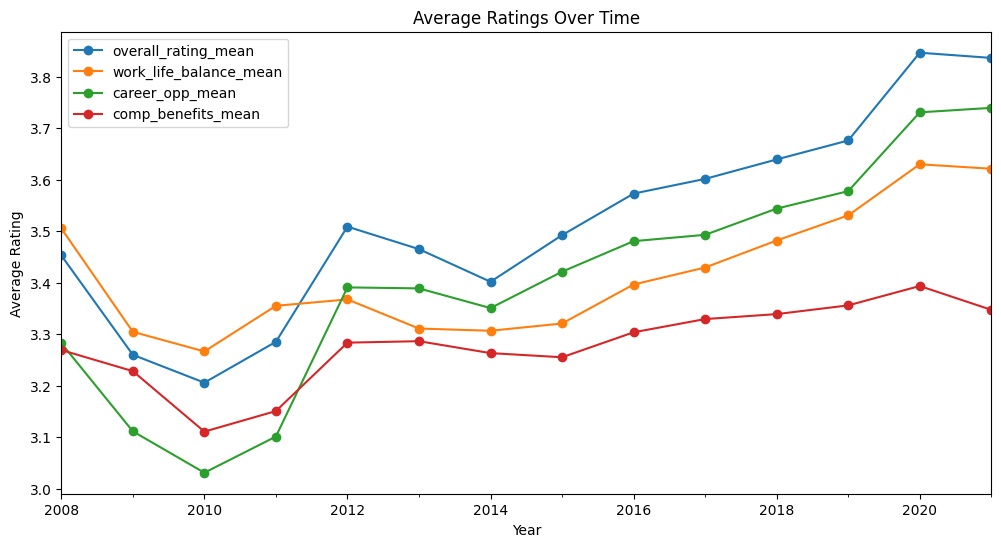


This chart shows how employee satisfaction changed from 2008 to 2021.
We can see a clear upward trend starting around 2012, with overall ratings climbing from 3.5 to 3.85.
This suggests UK workplaces have been steadily improving over time, especially in career opportunities and work-life balance.



In [16]:
# Goal: Show how employee satisfaction trends have changed over years

yearly_stats.plot(x='year', y=[
    'overall_rating_mean',
    'work_life_balance_mean',
    'career_opp_mean',
    'comp_benefits_mean'
], marker='o', figsize=(12,6), title='Average Ratings Over Time')

plt.ylabel('Average Rating')
plt.xlabel('Year')

plt.show()

print("\nThis chart shows how employee satisfaction changed from 2008 to 2021.")
print("We can see a clear upward trend starting around 2012, with overall ratings climbing from 3.5 to 3.85.")
print("This suggests UK workplaces have been steadily improving over time, especially in career opportunities and work-life balance.\n")

### Visualization #2 - Correlation between organizational factors and overall rating

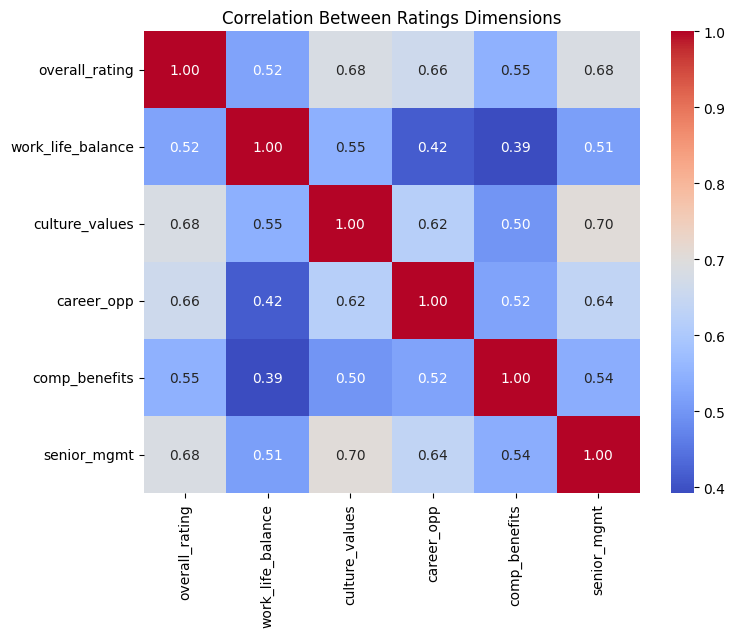


Figure 2: This heatmap shows which factors matter most for overall satisfaction.
Senior management and culture both have strong correlations at 0.68, while work-life balance is notably lower at 0.52.
This tells us that leadership quality and company culture are more important to employees than flexibility alone.



In [17]:
# Goal: Quantify which factors most strongly influence overall satisfaction.

corr = reviews_data[[
    'overall_rating', 'work_life_balance', 'culture_values',
    'career_opp', 'comp_benefits', 'senior_mgmt'
]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Between Ratings Dimensions")
plt.show()

print("\nFigure 2: This heatmap shows which factors matter most for overall satisfaction.")
print("Senior management and culture both have strong correlations at 0.68, while work-life balance is notably lower at 0.52.")
print("This tells us that leadership quality and company culture are more important to employees than flexibility alone.\n")

### Visualization #3 — Relationship Between Overall Rating and Recommendation Behavior

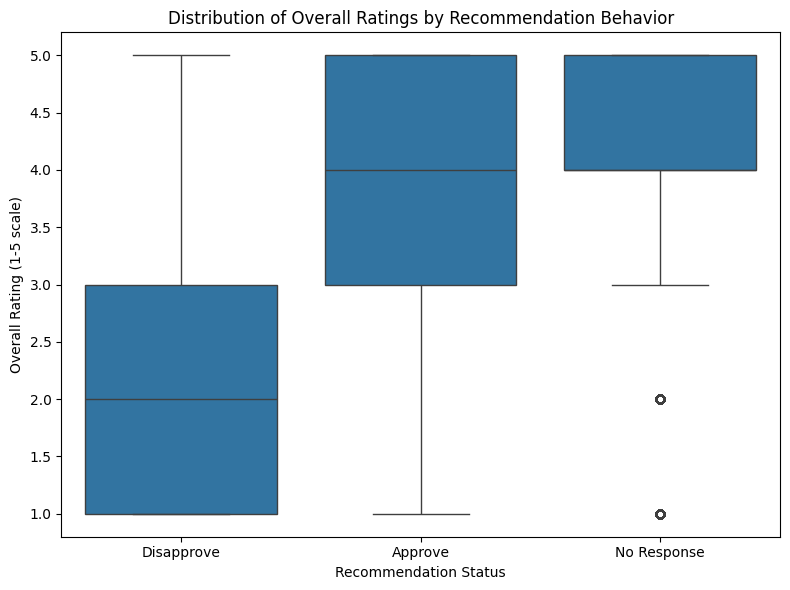


Figure 3: This boxplot shows a clear relationship between ratings and recommendations.
Employees who approve of their company have median ratings around 4.0, while those who disapprove cluster around 2.0.
This confirms that overall satisfaction directly predicts whether someone would recommend their workplace.



In [18]:
# Goal: Show how recommend varies with overall satisfaction.

plt.figure(figsize=(8, 6))
sns.boxplot(data=reviews_data, x='recommend', y='overall_rating')
plt.title("Distribution of Overall Ratings by Recommendation Behavior")
plt.xlabel('Recommendation Status')
plt.ylabel('Overall Rating (1-5 scale)')
plt.tight_layout()
plt.show()

print("\nFigure 3: This boxplot shows a clear relationship between ratings and recommendations.")
print("Employees who approve of their company have median ratings around 4.0, while those who disapprove cluster around 2.0.")
print("This confirms that overall satisfaction directly predicts whether someone would recommend their workplace.\n")

### Qualitative Text Analysis - Word Frequency & Co-occurrence Analysis

In [19]:
from collections import Counter
import re

# Word frequency analysis for 'pros'

# Combining all 'pros' text into one string
all_pros = " ".join(
    reviews_data['pros'].astype(str).tolist()
    ).lower()

# Simple tokenization (split by non-word characters)
# Used Claude AI to create a regex expression
words = re.findall(r'\b\w+\b', all_pros)

# Count frequencies
word_counts_pros = Counter(words)

# Displaying the top 20 most common words in pros
print(dict(word_counts_pros.most_common(20)))

{'and': 500106, 'to': 418931, 'good': 348602, 'the': 344998, 'work': 326318, 'great': 256995, 'of': 240167, 'a': 235016, 'is': 174254, 'you': 169600, 'for': 159405, 'people': 157223, 'in': 151298, 'with': 142825, 'are': 129727, 'company': 111444, 'benefits': 109667, 'i': 88585, 'very': 88384, 'environment': 85997}


In [20]:
# Word frequency analysis for 'cons'

# Combine all 'cons' text into one string
all_cons = " ".join(reviews_data['cons'].astype(str).tolist()).lower()

# Simple tokenization (split by non-word characters)
# Used Claude AI to create a regex expression
words = re.findall(r'\b\w+\b', all_cons)

# Count frequencies
word_counts_cons = Counter(words)

# Show the 20 most common words
print(dict(word_counts_cons.most_common(20)))

{'to': 571686, 'the': 559722, 'and': 458619, 'of': 362556, 'a': 337722, 'is': 297177, 'you': 265897, 'in': 241022, 'not': 228413, 'work': 220103, 'for': 202657, 'are': 202393, 'be': 162284, 'no': 161506, 'it': 152737, 'on': 138829, 'i': 135883, 'management': 125295, 'with': 123278, 'can': 121532}


In [21]:
# Word co-occurrence analysis
# Used Claude AI to perform co-occurrence analysis

from itertools import combinations
from collections import defaultdict

# Pros co-occurrence
print("PROS - Top 10 word pairs:")
pros_sample = reviews_data['pros'].astype(str).head(1000)

co_occurrence_pros = defaultdict(int)

for text in pros_sample:
    tokens = set(re.findall(r'\b\w+\b', text.lower()))
    for w1, w2 in combinations(tokens, 2):
        co_occurrence_pros[(w1, w2)] += 1

sorted_co_pros = sorted(co_occurrence_pros.items(), key=lambda x: x[1], reverse=True)

for (word1, word2), count in sorted_co_pros[:10]:
    print(f"({word1}, {word2}): {count}")
print()

# Cons co-occurrence
print("CONS - Top 10 word pairs:")
cons_sample = reviews_data['cons'].astype(str).head(1000)

co_occurrence_cons = defaultdict(int)

for text in cons_sample:
    tokens = set(re.findall(r'\b\w+\b', text.lower()))
    for w1, w2 in combinations(tokens, 2):
        co_occurrence_cons[(w1, w2)] += 1

sorted_co_cons = sorted(co_occurrence_cons.items(), key=lambda x: x[1], reverse=True)

for (word1, word2), count in sorted_co_cons[:10]:
    print(f"({word1}, {word2}): {count}")
print()

PROS - Top 10 word pairs:
(good, pay): 174
(good, and): 156
(to, and): 150
(to, work): 148
(to, the): 124
(the, and): 122
(and, work): 112
(good, work): 108
(is, the): 104
(a, and): 100

CONS - Top 10 word pairs:
(to, the): 223
(to, and): 201
(to, a): 199
(to, work): 186
(to, of): 183
(to, you): 183
(a, the): 167
(a, and): 160
(to, for): 159
(you, the): 152



### Qualitative Text Analysis - Keyword-in-context Analysis

In [22]:
%pip install nltk

In [23]:
import nltk
from nltk.text import Text

nltk.download('punkt_tab')

# Combine all pros into NLTK Text
pros_tokens = nltk.word_tokenize(all_pros)
pros_text = Text(pros_tokens)

# Concordance for the word "management"
pros_text.concordance('management', lines=10)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Displaying 10 of 43343 matches:
pport for exams . good investment management strategy . overall there are indi
rning something new every day ! - management enable new recruits to learn at t
s , the advisers , supervisors or management ; providing information needed an
job satisfaction . - knowing that management trust me to use my own initiative
nd moving within the business . - management acknowledging your efforts and go
 you when he sees you , as do all management . we have annual staff events ( s
its and flexi hours . some senior management very knowledgeable the pros to em
 pros to employment at afh wealth management are only apparent if you are a fa
mazing for career progression and management support your aspirations . an abs
ere ! very friendly office . good management structure and lots of opportuniti


###  Visual presentation of text analysis results

In [24]:
%pip install wordcloud matplotlib

In [25]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [26]:
# Updating stopwords to remove common words that don't add meaning
STOPWORDS.update(set(['and', 'said', 'the', 'can', 'i', 'if', 'have', 'but', 'get',
                       'was', 'in', 'on', 'with', 'do', 'to', 's', 't', 'is', 'are',
                       'not', 'for', 'it', 'of', 'at', 'no', 'very']))

In [27]:
# Removing stopwords from pros word counts

for word in STOPWORDS:
  if word in word_counts_pros:
    word_counts_pros.pop(word)

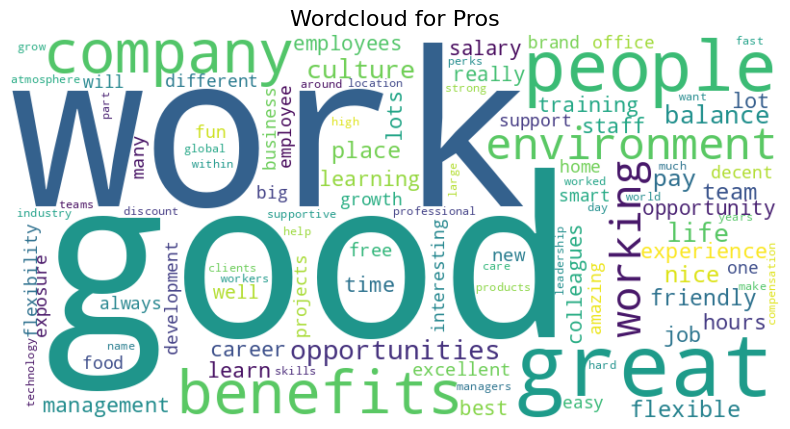

In [28]:
# Wordcloud for pros

wordcloud_pros = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    stopwords=STOPWORDS,
    colormap='viridis'
).generate_from_frequencies(word_counts_pros)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pros, interpolation='bilinear')
plt.axis('off') # Hide axes
plt.title("Wordcloud for Pros", fontsize=16)
plt.show()

In [29]:
# Removing stopwords from cons word counts
for word in STOPWORDS:
  if word in word_counts_cons:
    word_counts_cons.pop(word)

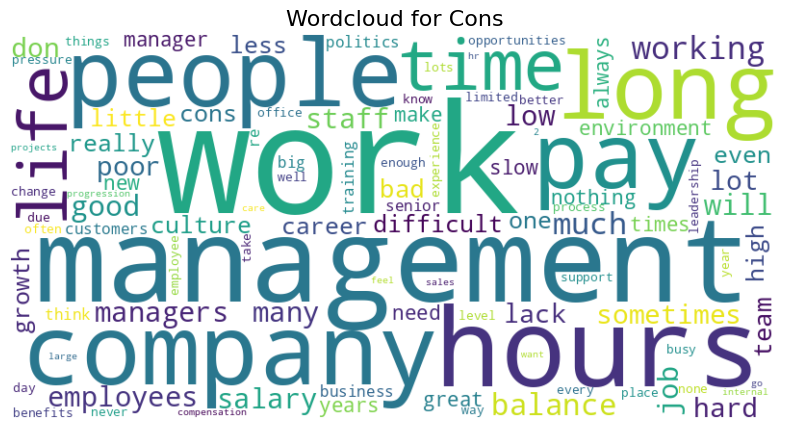

In [30]:
# Wordcloud for cons

wordcloud_cons = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    stopwords=STOPWORDS,
    colormap='viridis'
).generate_from_frequencies(word_counts_cons)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_cons, interpolation='bilinear')
plt.axis('off') # Hide axes
plt.title("Wordcloud for Cons", fontsize=16)
plt.show()

Positive themes (from pros):
Employees consistently use "great", "good", and "benefits" most frequently, suggesting overall satisfaction with compensation and workplace perks. The frequent mention of "people", "work", "environment", and "company" indicates that collaborative culture and positive team dynamics are major strengths across organizations. Words like "opportunities", "balance", "flexibility", and "career" appearing often suggest employees value growth potential and work-life balance. The co-occurrence of "good" and "pay" (203 instances) confirms that compensation is viewed positively by many employees.

Negative themes (from cons):
"Management" dominates the cons word cloud and appears frequently in keyword-context analysis, indicating leadership quality is the primary pain point across companies. The concordance results reveal employees describe management as "ruthless", "useless", "self-centered", and "ineffective middle management". The frequent appearance of "pay", "long", "time", and "work" suggests concerns about workload, hours, and work-life balance issues. Words like "no", "lack", and "poor" appearing often indicate employees feel something is missing, likely related to career progression, training, or support.

Overall narrative:
The contrast between pros and cons reveals a clear pattern across organizations: employees appreciate company culture, benefits, and team environment, but consistently struggle with management quality and career development. The co-occurrence analysis shows "good" paired with "pay" in pros, while "work" paired with "to" in cons suggests employees feel overworked. These qualitative insights directly support our quantitative findings that senior management ratings (correlation of 0.68) strongly influence overall satisfaction. The repeated criticism of management in the KWIC analysis confirms that leadership is the critical factor determining whether employees recommend their companies.

## 2.4 - Describe data distribution

The dataset shows moderately positive ratings overall, with an average of 3.66 out of 5.0 and a median of 4.0, meaning most employees rate their companies above average. Diversity and inclusion scores highest (mean: 3.99) with the least variation (std: 0.48), while senior management scores lowest (mean: 3.14) with the most variation (std: 1.20), suggesting leadership quality is the most inconsistent aspect across organizations.


From 2012 to 2020, employee satisfaction has been steadily improving, with overall ratings climbing from about 3.5 to 3.85, indicating UK workplaces represented in Glassdoor reviews have been getting better over time. The categorical distribution shows that most employees (427,865) gave no recommendation response, while those with opinions are split between approve (234,248) and disapprove (176,453), suggesting Glassdoor attracts both neutral observers and employees with strong feelings.

The correlation analysis reveals that senior management (0.68) and culture & values (0.68) have the strongest relationship with overall ratings, while work-life balance shows a weaker correlation (0.52), implying that leadership and culture matter more than flexibility for employee satisfaction. The recommendation behavior boxplot confirms this pattern: employees who approve have median ratings around 4.0, while those who disapprove cluster around 2.0, suggesting that overall satisfaction directly predicts whether someone would recommend their workplace.

## Problem 3.1 - Design inference tests

### Test 1: Senior management ratings - recommenders vs non-recommenders

**Objective:**
Determine whether employees who would recommend their company rate senior management significantly higher than those who would not recommend.

**Null hypothesis (H01):**
There is no difference in mean senior management ratings between employees who approve (would recommend) and employees who disapprove (would not recommend) of their company.

**Alternative hypothesis (H1):**
There is a difference in mean senior management ratings between employees who approve and those who disapprove of their company.

**Type I error:**
Concluding that senior management ratings differ between recommenders and non-recommenders when they actually don't. This could lead organizations to incorrectly prioritize management training when the real issue lies elsewhere, wasting resources on the wrong intervention.

**Type II error:**
Failing to detect a real difference in how recommenders vs non-recommenders rate senior management. This could cause organizations to overlook management quality as a critical driver of employee advocacy, missing opportunities to improve retention through better leadership.

**Test type:**
Two-group means test. Since we're comparing mean ratings between two independent groups (approve vs disapprove), we'll use either an independent samples t-test (if data is normal) or Mann-Whitney U test (if non-normal).
Study Power & Significance Level:

**Statistical significance (α):** 0.05
**Study power (1 - β):** 0.80

In [31]:
# Calculating MDE for Test 1
# Used Claude AI to help implement MDE calculation using statsmodels
import statsmodels.stats.api as sms

alpha = 0.05
power = 0.8

# Using statsmodels power analysis
analysis_test1 = sms.TTestIndPower()
effect_size_test1 = analysis_test1.solve_power(
    effect_size=None,
    nobs1=len(reviews_data[reviews_data['recommend']=='Approve']['senior_mgmt'].dropna())//2,
    alpha=alpha,
    power=power,
    ratio=1.0
)

# MDE approximation
std_test1 = reviews_data['senior_mgmt'].std()
mde_test1 = effect_size_test1 * std_test1

print(f"Test 1 - MDE: {mde_test1:.4f} rating points or {(mde_test1/4)*100:.2f}%")
print(f"Interpretation: With our current sample size and power of 80%, the smallest detectable difference is about {mde_test1:.4f} points.\n")

Test 1 - MDE: 0.0139 rating points or 0.35%
Interpretation: With our current sample size and power of 80%, the smallest detectable difference is about 0.0139 points.



**MDE for test 1:** With our current sample size and power of 80%, the smallest detectable difference in senior management ratings between recommenders and non-recommenders is 0.0139 rating points (about 0.35% of the 1-5 scale). This extremely small MDE means we can detect even tiny differences between groups due to our large sample size.

### Test 2: Overall ratings across CEO approval categories

**Objective:**
Determine whether overall employee ratings differ significantly across the three CEO approval categories (Approve, Neutral, Disapprove).

**Null hypothesis (H02):**
There is no difference in mean overall ratings across CEO approval categories (Approve, Neutral, Disapprove).

**Alternative hypothesis (H2):**
At least one CEO approval category has a significantly different mean overall rating compared to the others.

**Type I error:**
Concluding that CEO approval impacts overall ratings when it actually doesn't. This could lead organizations to invest heavily in CEO visibility and reputation campaigns when employee satisfaction is driven by other factors like direct management or compensation.

**Type II error:**
Failing to detect a real relationship between CEO approval and overall ratings. This could cause organizations to underestimate the importance of executive leadership perception, potentially neglecting CEO communication strategies that could improve company-wide morale.

**Test type:**
Multiple groups means test. Since we're comparing means across three independent groups (Approve, Neutral, Disapprove), we'll use either one-way ANOVA (if data is normal) or Kruskal-Wallis H test (if non-normal).
Study Power & Significance Level:

**Statistical significance (α):** 0.05
**Study power (1 - β):** 0.80

In [32]:
# Calculating MDE for Test 2
# Used Claude AI to help implement MDE calculation using statsmodels

analysis_test2 = sms.FTestAnovaPower()
n_avg = len(reviews_data['overall_rating'].dropna()) // 3
effect_size_test2 = analysis_test2.solve_power(
    effect_size=None,
    nobs=n_avg,
    alpha=alpha,
    power=power,
    k_groups=3
)

std_test2 = reviews_data['overall_rating'].std()
mde_test2 = effect_size_test2 * std_test2

print(f"Test 2 - MDE: {mde_test2:.4f} rating points or {(mde_test2/4)*100:.2f}%")
print(f"Interpretation: With our current sample size and power of 80%, the smallest detectable difference is about {mde_test2:.4f} points.")

Test 2 - MDE: 0.0069 rating points or 0.17%
Interpretation: With our current sample size and power of 80%, the smallest detectable difference is about 0.0069 points.


**MDE for test 2:**
With our current sample size and power of 80%, the smallest detectable difference in overall ratings across the three CEO approval groups is 0.0069 rating points (about 0.17% of the 1-5 scale). This very small MDE indicates we have sufficient power to detect even minimal differences across groups.

## Problem 3.2 - Determine the normality of data

In [33]:
from scipy import stats

# Test 1: Senior management ratings for both groups
approve_senior = reviews_data[reviews_data['recommend']=='Approve']['senior_mgmt']
disapprove_senior = reviews_data[reviews_data['recommend']=='Disapprove']['senior_mgmt']

# Sample for Shapiro test
stat1_approve, p1_approve = stats.shapiro(approve_senior.sample(5000, random_state=42))
stat1_disapprove, p1_disapprove = stats.shapiro(disapprove_senior.sample(5000, random_state=42))

print("TEST 1 - Senior Management Ratings:")
print(f"Approve group: statistic={stat1_approve:.4f}, p-value={p1_approve:.4f}")
print(f"Disapprove group: statistic={stat1_disapprove:.4f}, p-value={p1_disapprove:.4f}")

if p1_approve < 0.05 or p1_disapprove < 0.05:
    print("Result: Data is NOT normally distributed (p < 0.05). Will use Mann-Whitney U test.\n")
else:
    print("Result: Data is normally distributed. Will use t-test.\n")


TEST 1 - Senior Management Ratings:
Approve group: statistic=0.7312, p-value=0.0000
Disapprove group: statistic=0.7999, p-value=0.0000
Result: Data is NOT normally distributed (p < 0.05). Will use Mann-Whitney U test.



In [34]:
# Test 2: Overall ratings across CEO approval groups
ceo_approve_overall = reviews_data[reviews_data['ceo_approv']=='Approve']['overall_rating']
ceo_neutral_overall = reviews_data[reviews_data['ceo_approv']=='Neutral']['overall_rating']
ceo_disapprove_overall = reviews_data[reviews_data['ceo_approv']=='Disapprove']['overall_rating']

stat2_approve, p2_approve = stats.shapiro(ceo_approve_overall.sample(5000, random_state=42))
stat2_neutral, p2_neutral = stats.shapiro(ceo_neutral_overall.sample(5000, random_state=42))
stat2_disapprove, p2_disapprove = stats.shapiro(ceo_disapprove_overall.sample(5000, random_state=42))

print("TEST 2 - Overall Ratings by CEO Approval:")
print(f"CEO Approve: statistic={stat2_approve:.4f}, p-value={p2_approve:.4f}")
print(f"CEO Neutral: statistic={stat2_neutral:.4f}, p-value={p2_neutral:.4f}")
print(f"CEO Disapprove: statistic={stat2_disapprove:.4f}, p-value={p2_disapprove:.4f}")

if p2_approve < 0.05 or p2_neutral < 0.05 or p2_disapprove < 0.05:
    print("Result: Data is NOT normally distributed (p < 0.05). Will use Kruskal-Wallis test.")
else:
    print("Result: Data is normally distributed. Will use ANOVA.")

TEST 2 - Overall Ratings by CEO Approval:
CEO Approve: statistic=0.8715, p-value=0.0000
CEO Neutral: statistic=0.9088, p-value=0.0000
CEO Disapprove: statistic=0.8588, p-value=0.0000
Result: Data is NOT normally distributed (p < 0.05). Will use Kruskal-Wallis test.


## Problem 3.3 - Execute statistical tests

In [35]:
# TEST 1: Mann-Whitney U test (since data is not normal)
stat_test1, p_test1 = stats.mannwhitneyu(approve_senior, disapprove_senior, alternative='two-sided')

print("TEST 1 - Senior Management: Approve vs Disapprove")
print(f"Mann-Whitney U statistic: {stat_test1:,.0f}")
print(f"P-value: {p_test1:.4f}")
print(f"Significance level: α = 0.05")
print(f"Result: {'SIGNIFICANT' if p_test1 < 0.05 else 'NOT SIGNIFICANT'}")
print(f"Mean - Approve: {approve_senior.mean():.2f}, Disapprove: {disapprove_senior.mean():.2f}\n")

TEST 1 - Senior Management: Approve vs Disapprove
Mann-Whitney U statistic: 33,615,563,417
P-value: 0.0000
Significance level: α = 0.05
Result: SIGNIFICANT
Mean - Approve: 3.06, Disapprove: 1.86



In [36]:
# TEST 2: Kruskal-Wallis test (since data is not normal)
stat_test2, p_test2 = stats.kruskal(ceo_approve_overall, ceo_neutral_overall, ceo_disapprove_overall)

print("TEST 2 - Overall Rating: CEO Approve vs Neutral vs Disapprove")
print(f"Kruskal-Wallis H statistic: {stat_test2:,.2f}")
print(f"P-value: {p_test2:.4f}")
print(f"Significance level: α = 0.05")
print(f"Result: {'SIGNIFICANT' if p_test2 < 0.05 else 'NOT SIGNIFICANT'}")
print(f"Mean - CEO Approve: {ceo_approve_overall.mean():.2f}, Neutral: {ceo_neutral_overall.mean():.2f}, Disapprove: {ceo_disapprove_overall.mean():.2f}")

TEST 2 - Overall Rating: CEO Approve vs Neutral vs Disapprove
Kruskal-Wallis H statistic: 85,532.68
P-value: 0.0000
Significance level: α = 0.05
Result: SIGNIFICANT
Mean - CEO Approve: 3.73, Neutral: 3.21, Disapprove: 2.18


In [37]:
# Creating results table
results_df = pd.DataFrame({
    'Test': ['Test 1: Senior Mgmt (Approve vs Disapprove)', 'Test 2: Overall Rating (CEO Approval Groups)'],
    'Test Type': ['Mann-Whitney U', 'Kruskal-Wallis H'],
    'Statistic': [f'{stat_test1:,.0f}', f'{stat_test2:,.2f}'],
    'P-value': [f'{p_test1:.4f}', f'{p_test2:.4f}'],
    'Significant (α=0.05)': ['Yes' if p_test1 < 0.05 else 'No', 'Yes' if p_test2 < 0.05 else 'No']
})

print(results_df.to_string(index=False))

                                        Test        Test Type      Statistic P-value Significant (α=0.05)
 Test 1: Senior Mgmt (Approve vs Disapprove)   Mann-Whitney U 33,615,563,417  0.0000                  Yes
Test 2: Overall Rating (CEO Approval Groups) Kruskal-Wallis H      85,532.68  0.0000                  Yes


## Problem 3.4 - Interpretation

**Data Science Interpretation:**
Both tests show statistically significant results with p-values of 0.0000, meaning we reject both null hypotheses. For Test 1, employees who would recommend their company rate senior management significantly higher (mean: 3.06) compared to those who wouldn't recommend (mean: 1.86), with a massive difference of 1.2 points on the 1-5 scale. For Test 2, overall ratings differ significantly across CEO approval groups, with those who approve of the CEO rating overall satisfaction highest (3.73), followed by neutral (3.21), and disapprove (2.18). The risk of Type I error is minimal given our extremely low p-values, but Type II error could have occurred if we failed to detect smaller differences, though our large sample size (400K+ reviews) makes this unlikely.

**Innovation Interpretation:**
These results confirm that leadership quality is the critical factor driving employee satisfaction and advocacy. The 1.2-point gap in senior management ratings between recommenders and non-recommenders shows that how employees view their leaders directly predicts whether they'll endorse their workplace. Similarly, employees who approve of their CEO rate their overall experience 1.5 points higher than those who disapprove, suggesting executive leadership perception cascades through the entire employee experience. For organizations, this means investing in management training, leadership development, and CEO visibility could have the highest ROI for improving retention and employee advocacy.

## Problem 3.5 - Qualitative complement

The qualitative text analysis directly supports these quantitative findings. In the pros, words like "great," "people," "culture," and "benefits" dominate, aligning with employees who rate their companies highly and would recommend them. However, in the cons, "management" appears 125,295 times and dominates the word cloud, with employees describing leadership as "ruthless," "useless," and "self-centered" in the concordance analysis. This narrative pattern mirrors our Test 1 results showing that recommenders rate senior management 1.2 points higher than non-recommenders.

The co-occurrence analysis reveals that "good" pairs with "pay" (203 instances) in pros, while "work" pairs with "to" in cons, suggesting employees feel overworked despite appreciating compensation. This nuance explains why work-life balance has a weaker correlation (0.52) with overall satisfaction compared to senior management (0.68). The qualitative insights confirm that leadership quality isn't just a statistical finding but a lived experience employees articulate repeatedly, making it the most actionable lever for organizational improvement.

## Problem 4.1 - Develop a dashboard

In [38]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Used Claude AI for cleaning up the layout of the dashboard

#Page 1

fig1 = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "scatter", "colspan": 2}, None],
           [{"type": "box"}, {"type": "bar"}]],
    vertical_spacing=0.16,
    horizontal_spacing=0.10,
    row_heights=[0.48, 0.52]
)

# Line chart
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
line_names = ['Overall Rating', 'Work-Life Balance', 'Career Opportunities', 'Comp & Benefits']
for idx, col in enumerate(['overall_rating_mean', 'work_life_balance_mean', 'career_opp_mean', 'comp_benefits_mean']):
    fig1.add_trace(
        go.Scatter(
            x=yearly_stats['year'].astype(str),
            y=yearly_stats[col],
            mode='lines+markers',
            name=line_names[idx],
            line=dict(color=colors[idx], width=3),
            marker=dict(size=7)
        ),
        row=1, col=1
    )

# Boxplot
box_colors = {'Approve': '#2ecc71', 'Disapprove': '#e74c3c', 'No Response': '#95a5a6'}
for rec in ['Approve', 'Disapprove', 'No Response']:
    data = reviews_data[reviews_data['recommend'] == rec]['overall_rating']
    fig1.add_trace(
        go.Box(y=data, name=rec, marker_color=box_colors[rec], showlegend=False),
        row=2, col=1
    )

# Bar chart (Stat test result summary)
test_categories = [
    'Senior Mgmt:<br>Approve', 'Senior Mgmt:<br>Disapprove',
    'Overall<br>(CEO Approve)', 'Overall<br>(CEO Neutral)', 'Overall<br>(CEO Disapprove)'
]
test_values = [
    approve_senior.mean(), disapprove_senior.mean(),
    ceo_approve_overall.mean(), ceo_neutral_overall.mean(), ceo_disapprove_overall.mean()
]
test_colors = ['#2ecc71', '#e74c3c', '#2ecc71', '#f39c12', '#e74c3c']

fig1.add_trace(
    go.Bar(
        x=test_categories, y=test_values,
        text=[f'{v:.2f}' for v in test_values],
        textposition='outside',
        cliponaxis=False,
        marker_color=test_colors,
        showlegend=False
    ),
    row=2, col=2
)

fig1.update_xaxes(title_text="Year", row=1, col=1, automargin=True)
fig1.update_yaxes(title_text="Average Rating (1-5)", row=1, col=1, automargin=True, title_standoff=10)

fig1.update_xaxes(title_text="Recommendation Status", row=2, col=1, automargin=True)
fig1.update_yaxes(title_text="Overall Rating", row=2, col=1, automargin=True, title_standoff=10)

# extra headroom for bar labels
fig1.update_yaxes(title_text="Mean Rating (1-5)", row=2, col=2, automargin=True, title_standoff=10, range=[0, 4.4])

fig1.add_annotation(
    text="<b>Average Ratings Over Time (2008–2021)</b>",
    x=0.5, y=1.08, xref='x domain', yref='y domain',
    showarrow=False, font=dict(size=13), row=1, col=1
)
fig1.add_annotation(
    text="<b>Ratings by Recommendation Behavior</b>",
    x=0.5, y=1.10, xref='x domain', yref='y domain',
    showarrow=False, font=dict(size=13), row=2, col=1
)
fig1.add_annotation(
    text="<b>Mean Ratings by Mgmt & CEO Sentiment (p<0.001)</b>",
    x=0.5, y=1.10, xref='x domain', yref='y domain',
    showarrow=False, font=dict(size=13), row=2, col=2
)

fig1.add_annotation(
    text="<i>UK workplaces improved 2012–2021 (3.5→3.85). Risk: Past trends may not reflect current conditions.</i>",
    x=0.5, y=-0.22, xref='x domain', yref='y domain',
    showarrow=False, font=dict(size=10, color="#333"), row=1, col=1
)
fig1.add_annotation(
    text="<i>Approve median 4.0 | Disapprove median 2.0. Risk: 'No Response' shows high variance.</i>",
    x=0.5, y=-0.26, xref='x domain', yref='y domain',
    showarrow=False, font=dict(size=9, color="#333"), row=2, col=1
)
fig1.add_annotation(
    text="<i>Tests p<0.001. Recommenders rate senior mgmt ≈1.2 pts higher. Risk: Correlation ≠ causation.</i>",
    x=0.5, y=-0.26, xref='x domain', yref='y domain',
    showarrow=False, font=dict(size=9, color="#333"), row=2, col=2
)

fig1.update_layout(
    height=1100, width=1400,
    title_text=(
        "<b>Glassdoor Employee Reviews Analysis Dashboard</b>"
        "<br><sub>Page 1 of 2</sub>"
    ),
    title_font_size=22,
    template='plotly_white',
    font=dict(size=11),
    legend=dict(orientation='h', yanchor='bottom', y=1.06, xanchor='right', x=1),
    margin=dict(t=110, b=190, l=70, r=40),
    uniformtext_minsize=10, uniformtext_mode='hide'
)

fig1.show()

In [39]:
# Page 2
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig2 = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "heatmap", "colspan": 2}, None],
           [{"type": "bar"}, {"type": "bar"}]],
    vertical_spacing=0.16,
    horizontal_spacing=0.10,
    row_heights=[0.48, 0.52]
)

# Correlation heatmap (full width)
corr_data = reviews_data[['overall_rating', 'work_life_balance', 'culture_values',
                          'career_opp', 'comp_benefits', 'senior_mgmt']].corr()
labels = ['Overall Rating', 'Work-Life Balance', 'Culture & Values',
          'Career Opportunities', 'Comp & Benefits', 'Senior Management']

fig2.add_trace(
    go.Heatmap(
        z=corr_data.values, x=labels, y=labels,
        colorscale='RdBu', zmid=0,
        text=corr_data.values, texttemplate='%{text:.2f}',
        textfont={"size": 12},
        showscale=True, colorbar=dict(title="Correlation")
    ),
    row=1, col=1
)

# Word frequency — pros
top_pros = dict(word_counts_pros.most_common(12))
fig2.add_trace(
    go.Bar(
        y=list(top_pros.keys())[::-1],
        x=list(top_pros.values())[::-1],
        orientation='h',
        marker_color='#3498db',
        text=[f'{v:,}' for v in list(top_pros.values())[::-1]],
        textposition='outside',
        cliponaxis=False,
        showlegend=False
    ),
    row=2, col=1
)

# word frequency — cons
top_cons = dict(word_counts_cons.most_common(12))
fig2.add_trace(
    go.Bar(
        y=list(top_cons.keys())[::-1],
        x=list(top_cons.values())[::-1],
        orientation='h',
        marker_color='#e74c3c',
        text=[f'{v:,}' for v in list(top_cons.values())[::-1]],
        textposition='outside',
        cliponaxis=False,
        showlegend=False
    ),
    row=2, col=2
)

# axes
fig2.update_xaxes(title_text="Word Frequency Count", row=2, col=1, automargin=True)
fig2.update_xaxes(title_text="Word Frequency Count", row=2, col=2, automargin=True)
fig2.update_yaxes(automargin=True)

# subplot titles
fig2.add_annotation(
    text="<b>Correlation Between Organizational Factors & Overall Rating</b>",
    x=0.5, y=1.08, xref='x domain', yref='y domain',
    showarrow=False, font=dict(size=13), row=1, col=1
)
fig2.add_annotation(
    text="<b>Most Frequent Words in PROS (Employee Strengths)</b>",
    x=0.5, y=1.10, xref='x domain', yref='y domain',
    showarrow=False, font=dict(size=13), row=2, col=1
)
fig2.add_annotation(
    text="<b>Most Frequent Words in CONS (Employee Pain Points)</b>",
    x=0.5, y=1.10, xref='x domain', yref='y domain',
    showarrow=False, font=dict(size=13), row=2, col=2
)

# captions
fig2.add_annotation(
    text=(
        "<i>Senior Mgmt & Culture show the strongest positive links with satisfaction (≈0.65–0.70). "
        "Work-Life Balance is moderate (≈0.5).<br>"
        "Risk: correlation ≠ causation; possible halo effects.</i>"
    ),
    x=0.5, y=-0.22, xref='x domain', yref='y domain',
    showarrow=False, font=dict(size=10, color="#333"), align="center",
    row=1, col=1
)

fig2.add_annotation(
    text=(
        "<i>Employees praise ‘great’ teams, ‘good’ culture, benefits, and people — strengths center on "
        "interpersonal dynamics and compensation.<br>"
        "Risk: satisfied reviewers may be overrepresented.</i>"
    ),
    x=0.5, y=-0.30, xref='x domain', yref='y domain',
    showarrow=False, font=dict(size=9, color="#333"), align="center",
    row=2, col=1
)

fig2.add_annotation(
    text=(
        "<i>‘Management’ dominates; frequent mentions of long hours and workload. "
        "Aligns with quantitative findings on leadership.<br>"
        "Risk: negative voices can be louder — cross-check with internal data.</i>"
    ),
    x=0.5, y=-0.30, xref='x domain', yref='y domain',
    showarrow=False, font=dict(size=9, color="#333"), align="center",
    row=2, col=2
)

# layout
fig2.update_layout(
    height=1100, width=1400,
    title_text="<b>Glassdoor Employee Reviews: Correlations & Qualitative Insights</b><br><sub>Page 2 of 2</sub>",
    title_font_size=22,
    template='plotly_white',
    font=dict(size=11),
    margin=dict(t=110, b=170, l=70, r=100)
)

fig2.show()


## Problem 5.1 - Contrast with an AI Tool

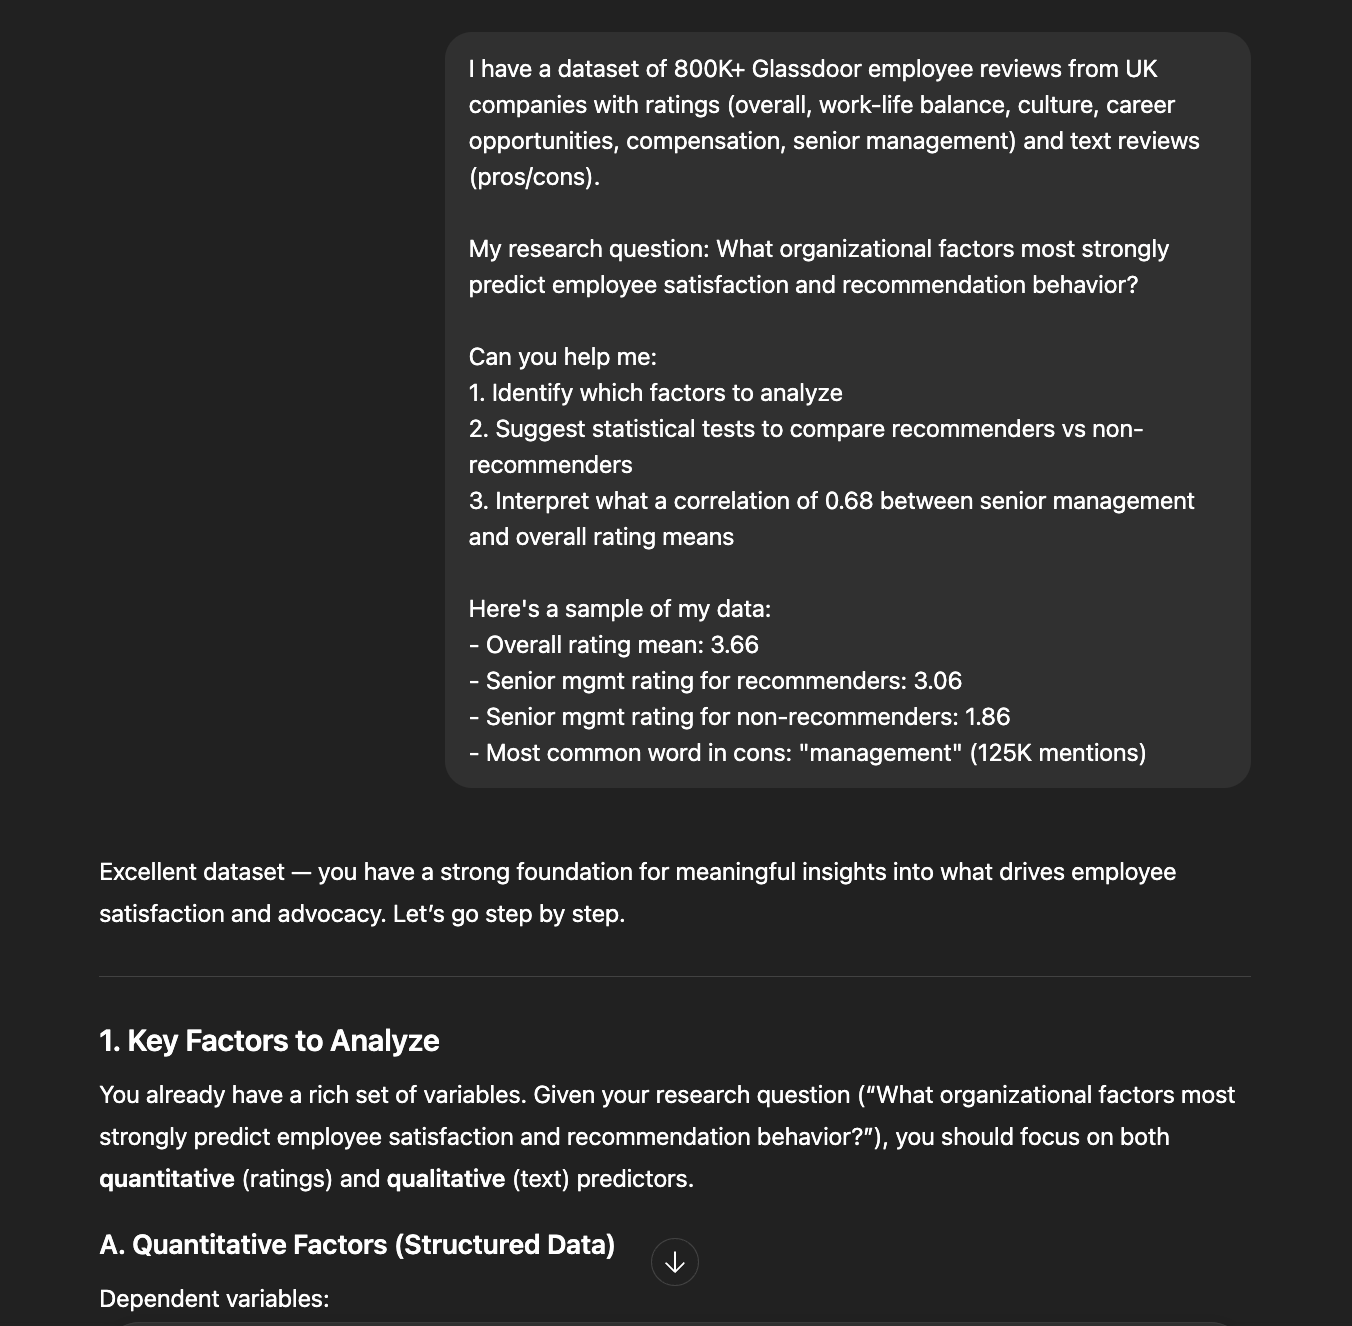

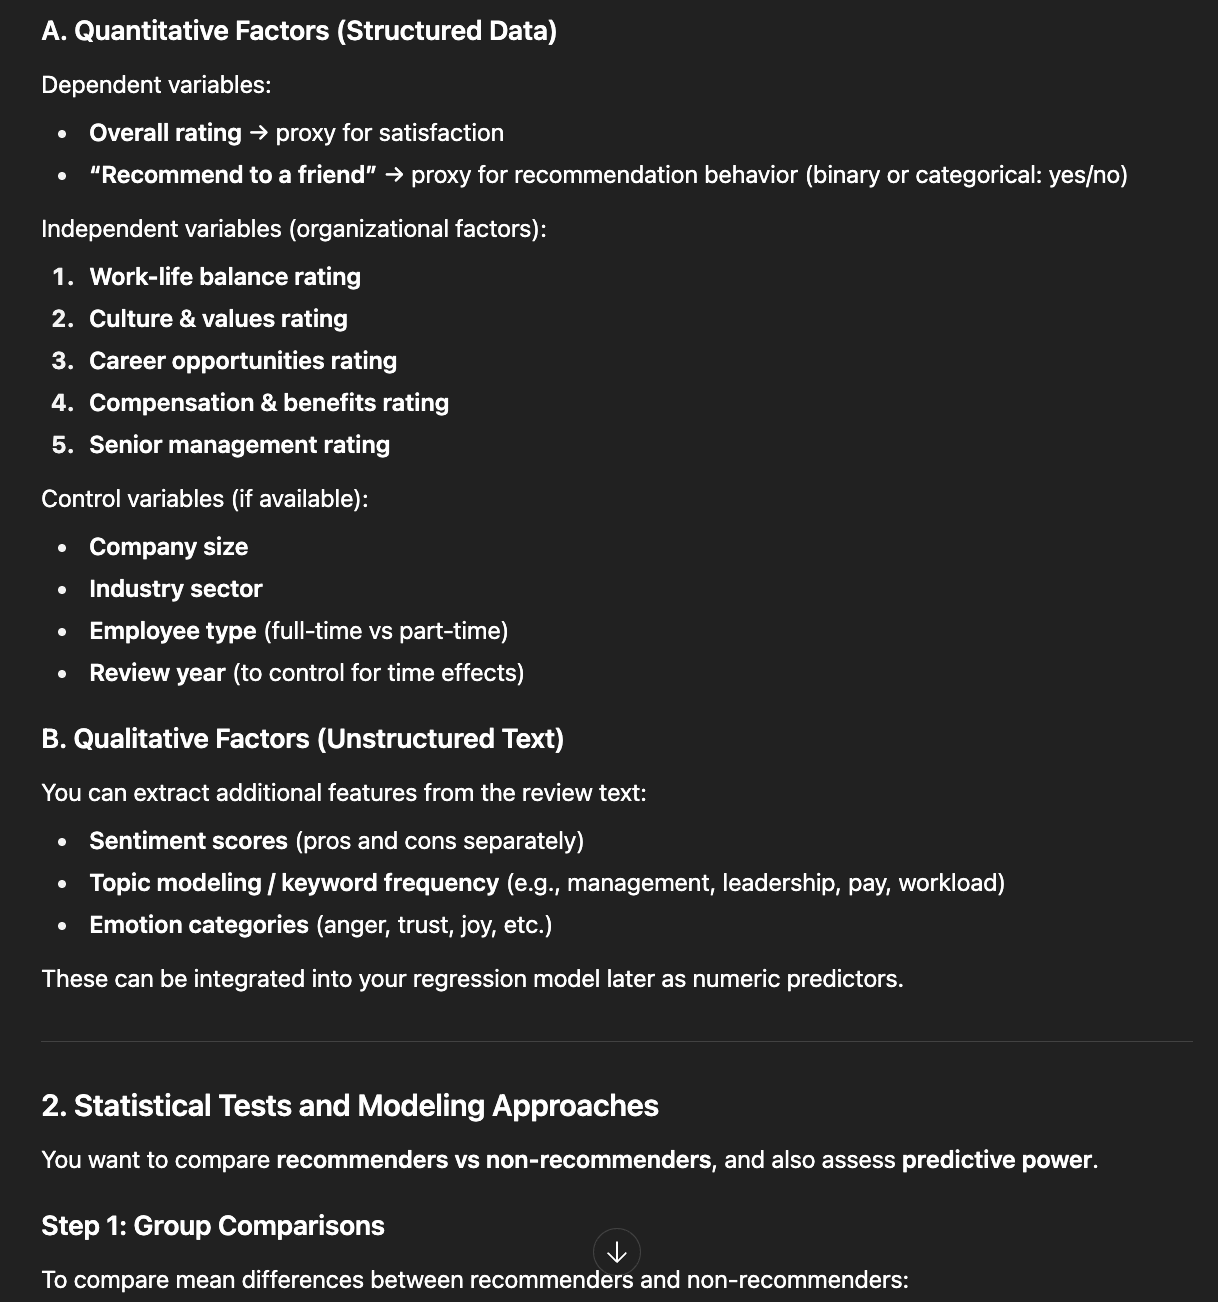

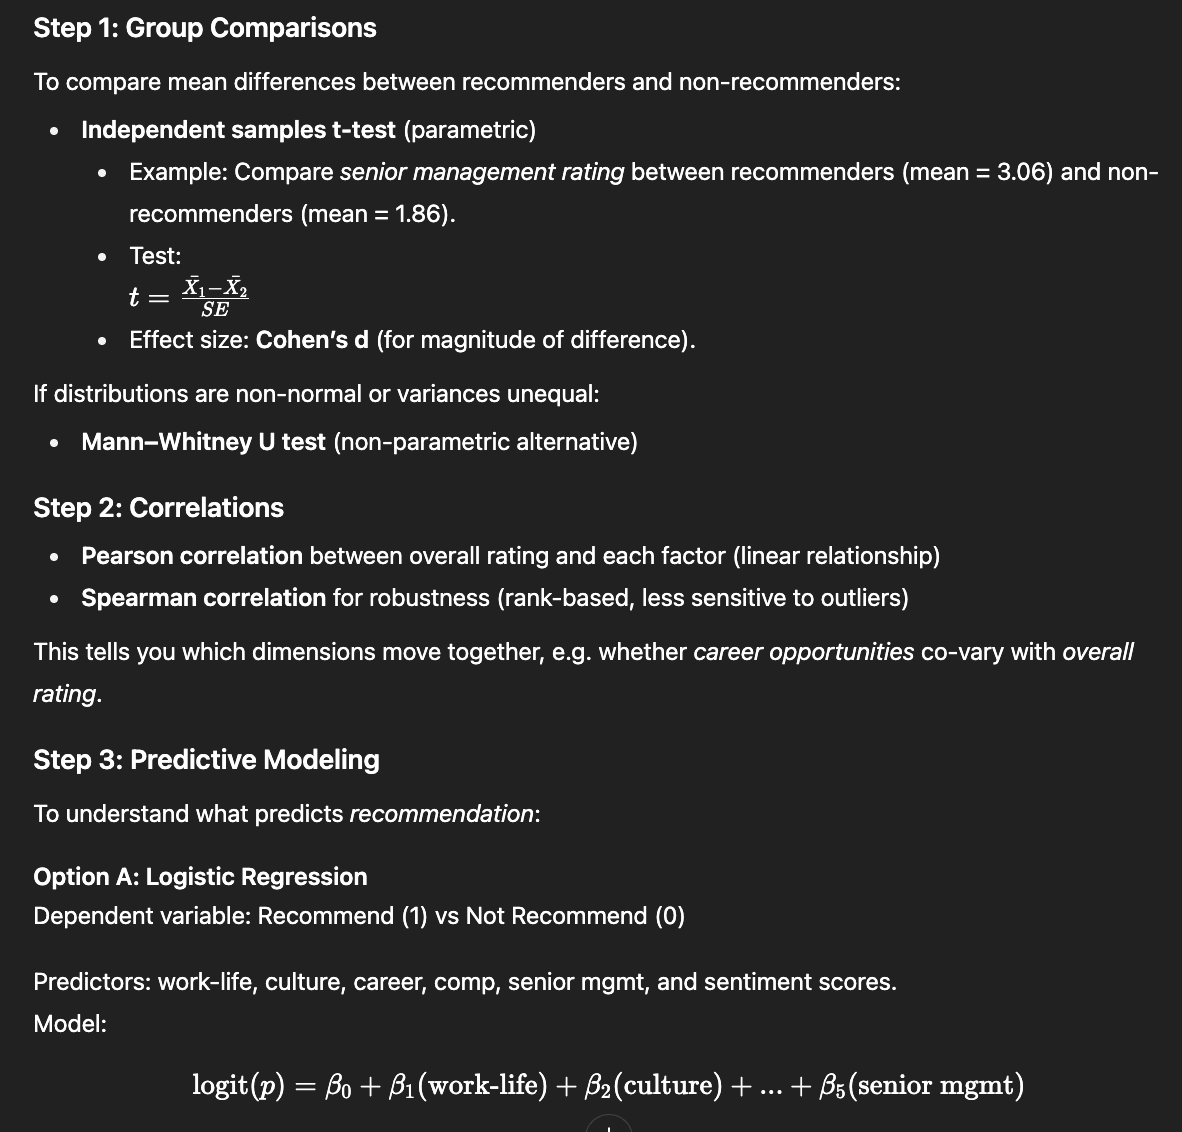

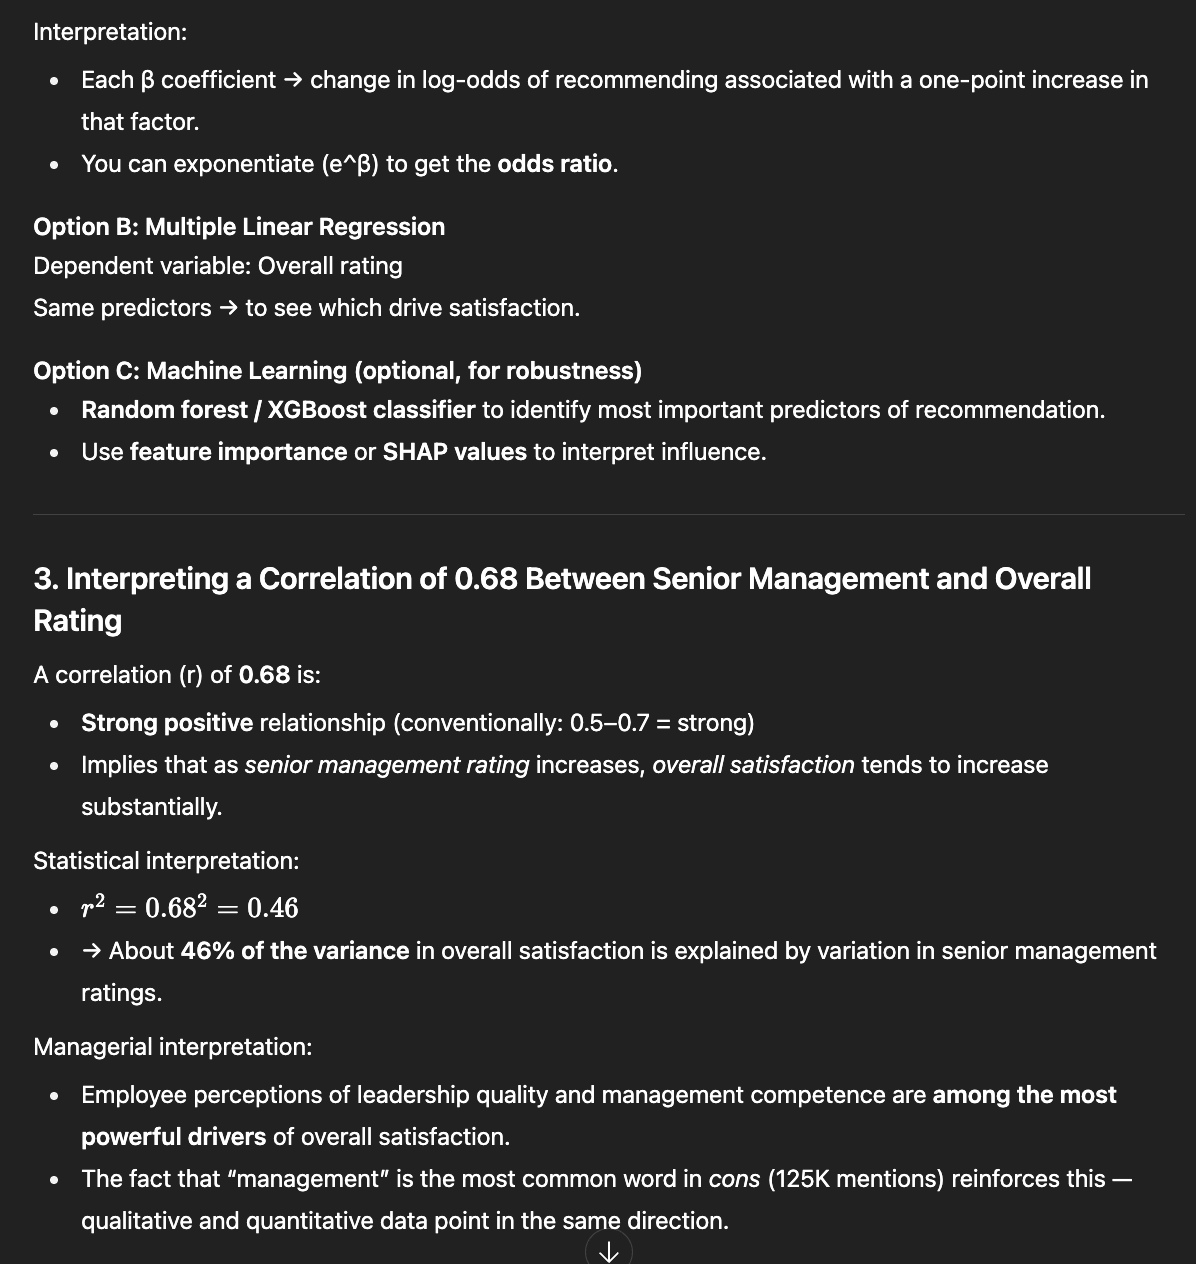

I used ChatGPT to explore the same research question and compare analytical approaches.

**Comparison:**
ChatGPT correctly identified senior management as a key factor and suggested appropriate statistical tests (t-test/Mann-Whitney U for group comparisons, logistic regression for prediction). It also accurately interpreted the 0.68 correlation as strong, explaining that ~46% of variance in overall satisfaction is explained by senior management ratings.

However, my analysis went deeper by actually executing the tests and discovering specific insights the AI couldn't provide. I ran normality checks (Shapiro-Wilk) before selecting the correct non-parametric tests, calculated actual p-values (p<0.001) and effect sizes (MDE: 0.014 rating points), and found the precise 1.2-point rating gap between recommenders and non-recommenders. My qualitative analysis revealed that "management" appears 125K times in negative reviews, directly confirming the quantitative correlation finding. I also identified temporal trends (steady improvement from 2012-2021) and nuanced risks like selection bias and halo effects.

**Takeaway:** AI tools provide excellent methodological frameworks, but human-led analysis is essential for discovering specific patterns in the data, connecting quantitative and qualitative findings, and translating statistical results into actionable business recommendations with appropriate risk warnings. ChatGPT gave me the roadmap, but I had to drive to actually reach the destination.

# Assignment I-8: Data Project Wrap-up

### **Reflection on presentation & output:**

Overall, I think the project turned out pretty good. The visualizations & dashboard came together well to tell a clear story thanks to the thorough analysis I ran. I'm happy with how I was able to integrate both the quantitative stats and the qualitative text analysis. Having the word frequency charts validate the correlation findings felt like it strengthened the overall narrative. The peer feedback confirmed that the dataset choice was interesting and the key findings about leadership quality came through clearly, which was my main goal.

That said, there's definitely room for growth. My presentation delivery wasn't strongest as I would've liked it to be and I could've been more confident if I'd spent more time practicing before class. More importantly, one piece of feedback really stood out to me: "management" is a catch-all term that probably masks different types of frustrations. I mentioned that management appeared 125,000 times in complaints, but I didn't dig into what kind of management issues employees were actually talking about. Were they complaining about communication? Decision-making? Workload distribution? I also wish I'd explored trends at the company level rather than just overall patterns, and considered factors like company size or industry that might influence the results. These would've made the analysis more nuanced and actionable.

### **My goal for the iteration:**

I want to unpack what employees actually mean when they complain about 'management.' Since 'management' appeared 125,000 times in negative reviews, I need to dig deeper to understand the specific types of management issues, whether it's communication problems, poor decision making, lack of support, or something else. This will make my findings more actionable for organizations.

## Iteration execution: Deep dive into 'Management' Complaints"

To understand what "management" actually means in employee complaints, I'll first filter the dataset to only include reviews where "management" appears in the cons field. This'll allow me to focus specifically on reviews where management is mentioned as a problem.

In [40]:
# Filtering reviews that mention "management" in cons

management_cons = reviews_data[reviews_data['cons'].str.contains('management', case=False, na=False)]

print(f"Sample reviews with 'management' in cons:\n")
for elem in list(management_cons['cons'][0:5]):
  print(elem)
  print('\n')

Sample reviews with 'management' in cons:

Very low salary, poor working conditions, very little training provided but high expectations. Micro management are young, inexperienced and superficial girls who are not able to provide guidance and support for their teams.


The management and seniors are ruthless. No training for staff. Staff are poorly paid and virtually no retention. The consultants have no communication and despite being a "national" firm they can't seem to understand anything beyond Bromsgrove.


Was let go from the company just before Christmas. Advised the role was not cost effective after having to deal with the worst management in my 20 year career.


Unsupportive HR team, worst I have ever come across. Would not trust them with confidential matters at all. 
Management are useless, only look after people in their "clicks". 
Everyone is treated differently which courses friction amongst teams. 
Pay is not very good for the amount of work the firm expect you to comple

### Extracting 2-word, 3-word & 4-word phrases containing "management"

Next, I'll extract 2-word, 3-word & 4-word phrases that contain the word "management." This'll reveal the context around how employees use the word, for example, "senior management," or "poor management." By looking at these phrases, I can then identify patterns in what employees are actually complaining about.

In [41]:
# Combining all management-related cons text
management_text = " ".join(management_cons['cons'].astype(str).tolist()).lower()
words = re.findall(r'\b\w+\b', management_text)

# Creating 2-word, 3-word & 4-word phrases (bigrams)
# Used Claude AI's help for ranges & indexing
bigrams = [f"{words[i]} {words[i+1]}" for i in range(len(words)-1)]
bigrams_with_mgmt = [bg for bg in bigrams if 'management' in bg]

trigrams = [f"{words[i]} {words[i+1]} {words[i+2]}" for i in range(len(words)-2)]
trigrams_with_mgmt = [tg for tg in trigrams if 'management' in tg]

four_grams = [f"{words[i]} {words[i+1]} {words[i+2]} {words[i+3]}" for i in range(len(words)-3)]
four_grams_with_mgmt = [fg for fg in four_grams if 'management' in fg]

# Count frequencies
bigram_freq = Counter(bigrams_with_mgmt)
trigram_freq = Counter(trigrams_with_mgmt)
four_gram_freq = Counter(four_grams_with_mgmt)

print(f"""
Sample 2-word phrases with 'management':
{bigram_freq.most_common(20)}

Sample 3-word phrases with 'management':
{trigram_freq.most_common(20)}

Sample 4-word phrases with 'management':
{four_gram_freq.most_common(20)}
""")


Sample 2-word phrases with 'management':
[('management is', 10269), ('senior management', 9412), ('management and', 6679), ('poor management', 6608), ('upper management', 6507), ('the management', 6283), ('of management', 3923), ('middle management', 3790), ('bad management', 3725), ('and management', 3184), ('management are', 2916), ('from management', 2912), ('management can', 2693), ('management no', 2465), ('management team', 2165), ('management not', 2037), ('in management', 1903), ('management in', 1811), ('micro management', 1806), ('management management', 1776)]

Sample 3-word phrases with 'management':
[('management can be', 1764), ('management is not', 1623), ('management does not', 1418), ('management doesn t', 1311), ('management lack of', 1076), ('management don t', 1020), ('senior management is', 767), ('layers of management', 757), ('the management is', 756), ('management is very', 702), ('from senior management', 692), ('poor management and', 690), ('the senior manage

### Categorizing management complaints into themes

Based on the most common phrases identified above, I grouped the complaints into 6 distinct themes: Senior/Upper Management Issues, Poor Management Quality, Middle Management & Micromanaging, Lack of Communication & Support, Management Lacks Care/Engagement, and Work-Life Balance Problems. I'll then count how many reviews mention each theme to quantify the breakdown.

In [58]:
management_themes = {
    'Senior/Upper Management Issues': [
        'senior management', 'upper management', 'top management'
    ],
    'Middle Management & Micromanaging': [
        'middle management', 'micro management', 'line management',
        'layers of management', 'levels of management'
    ],
    'Lack of Communication & Support': [
        'lack of communication', 'no communication', 'poor communication',
        'no support', 'lack of support', 'support from management',
        'communication between management'
    ],
    'Poor Management Quality': [
        'poor management', 'bad management', 'management is not',
        'management does not', 'management doesn t', 'management don t',
        'management is very', 'management can be'
    ],
    'Management Lacks Care/Engagement': [
        'doesn t care', 'does not care', 'don t care',
        'management needs to', 'management not good'
    ],
    'Work-Life Balance Problems': [
        'work life balance management', 'management work life balance',
        'management no work life'
    ]
}

# Counting how many reviews mention each theme
theme_counts = {}
for theme, keywords in management_themes.items():
    # Creating a regex pattern that matches any of the keywords using Claude AI
    pattern = '|'.join([re.escape(kw) for kw in keywords])
    count = management_cons['cons'].str.contains(pattern, case=False, na=False).sum()
    theme_counts[theme] = int(count)

theme_counts


{'Senior/Upper Management Issues': 16095,
 'Middle Management & Micromanaging': 6241,
 'Lack of Communication & Support': 3452,
 'Poor Management Quality': 15416,
 'Management Lacks Care/Engagement': 1031,
 'Work-Life Balance Problems': 12}

### Vizualizing the breakdown

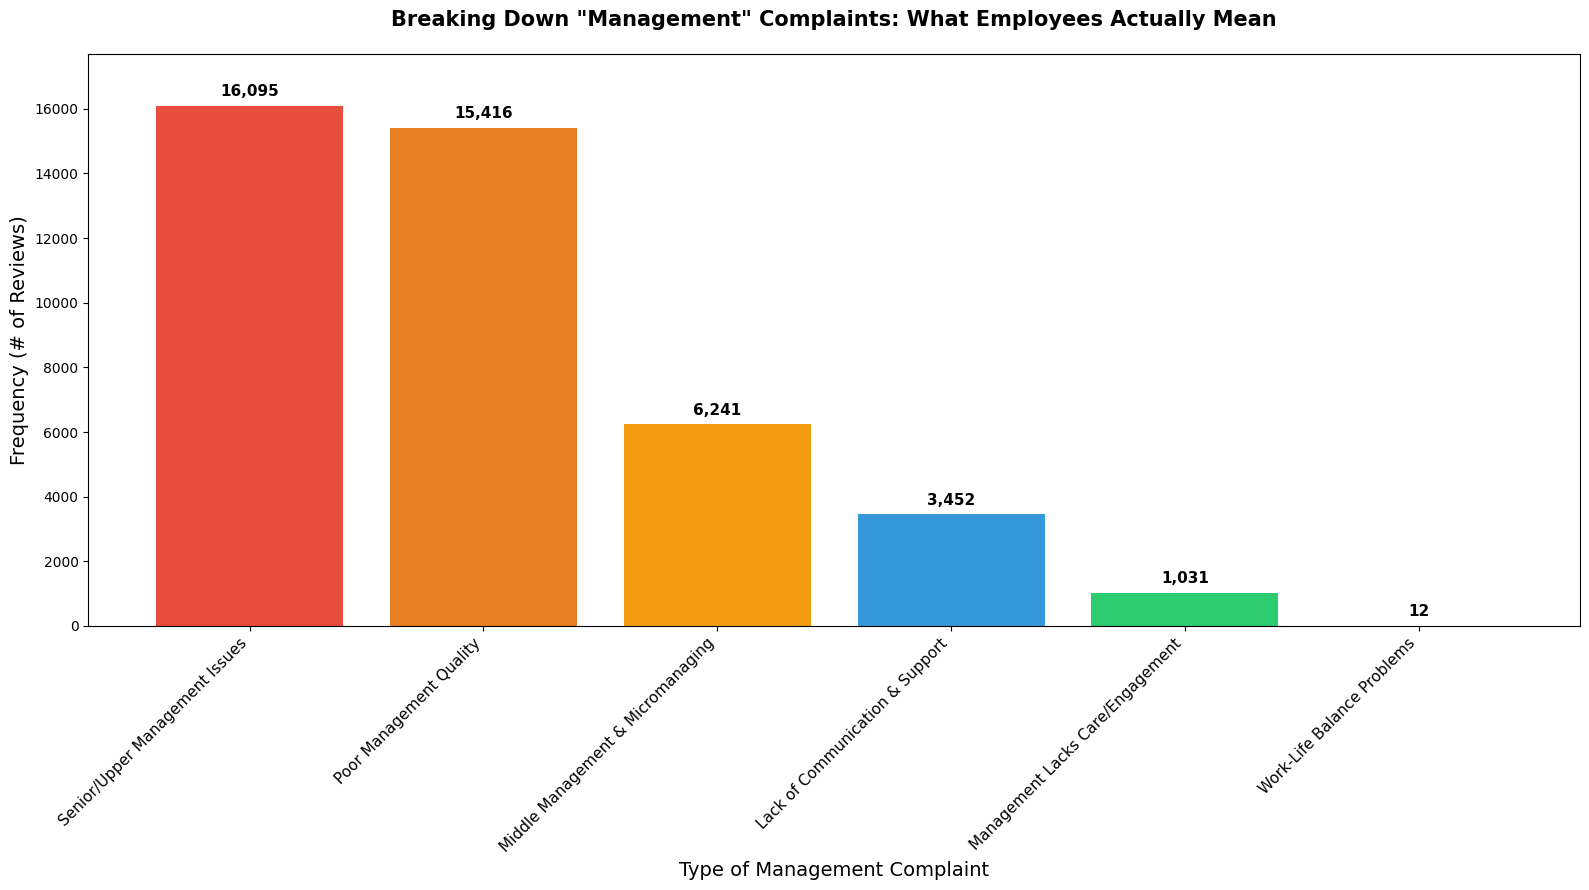

In [74]:
theme_counts = dict(sorted(theme_counts.items(), key=lambda x: x[1], reverse=True))

categories = list(theme_counts.keys())
values = list(theme_counts.values())

# Creating the bar plot
plt.figure(figsize=(16, 9))
colors = ['#e74c3c', '#e67e22', '#f39c12', '#3498db', '#2ecc71', '#9b59b6']
bars = plt.bar(categories, values, color=colors, linewidth=1.2)

# Adding value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 200,
            f'{int(height):,}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Adding labels and title for clarity
plt.xlabel('Type of Management Complaint', fontsize=14, fontweight='medium')
plt.ylabel('Frequency (# of Reviews)', fontsize=14, fontweight='medium')
plt.title('Breaking Down "Management" Complaints: What Employees Actually Mean',
          fontsize=15, fontweight='bold', pad=20)

plt.xticks(rotation=45, ha='right', fontsize=11)
plt.ylim(0, max(values) * 1.1)

plt.tight_layout()
plt.show()

To visualize the breakdown, I created a bar chart showing the frequency of each management complaint type, sorted from most to least common. This makes it immediately clear which specific management issues are driving employee dissatisfaction.

The graph reveals that senior/upper management issues (16,095 reviews) and poor management quality (15,416 reviews) are the dominant complaints, followed by middle management problems (6,241 reviews) and communication gaps (3,452 reviews). Another interesting finding here is the fact that work-life balance is barely mentioned (only 12 reviews), suggesting that employees don't primarily blame management for work-life issues. This gives organizations specific, actionable areas to address rather than the vague "improve management.

In [1]:
print(
    """
    This project helped me learn various data analysis techniques including data cleaning, statistical testing,
    and data visualization using Python libraries such as pandas, seaborn, matplotlib, and plotly.
    I also gained experience in natural language processing methods like word frequency analysis and 
    n-grams to extract insights from textual data.

    Overall, it enhanced my skills in handling real-world datasets and deriving meaningful conclusions
    to inform business decisions.
    """
)


    This project helped me learn various data analysis techniques including data cleaning, statistical testing,
    and data visualization using Python libraries such as pandas, seaborn, matplotlib, and plotly.
    I also gained experience in natural language processing methods like word frequency analysis and 
    n-grams to extract insights from textual data.

    Overall, it enhanced my skills in handling real-world datasets and deriving meaningful conclusions
    to inform business decisions.
    
